#### CAR PRICE ANALYSIS

### ANJALI L

### OVERVIEW: 
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:et.


## OBJECTIVE:
* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car
* You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

### SOURCE:
Chines Automobile Company

## FEATURES:
raws:26
columns:205

### LIBRARY IMPORING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")# to prevent warning msgs

#### DATA COLLECTION
## collect Carprice details from a excel dataset to find the proper data analysis using regression model 

In [3]:
carprice_df=pd.read_csv("CarPrice_Assignment.csv") #carprice_df indicates the loading data name)

In [5]:
carprice_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Car_price data Basic Statistics

In [7]:
carprice_df.shape

(205, 26)

In [9]:
carprice_df.info() #Basic Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
carprice_df.isnull().sum() #check to find null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
carprice_df.duplicated().sum() #check to find duplicates

0

## PRINT NUMERICAL AND CATEGORICAL COLUMNS

In [15]:
numerical_columns =carprice_df.select_dtypes(include=['number']).columns.tolist()
print("numerical_columns",numerical_columns)

numerical_columns ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [17]:
categorical_columns=carprice_df.select_dtypes(include=['object','category']).columns.tolist()
print("categorical_columns",categorical_columns)

categorical_columns ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### BASIC STATISTICS

In [19]:
print("Basic Statistics:")
carprice_df.describe() # print statstical information

Basic Statistics:


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### DATA VISUALIZATION

<Axes: ylabel='price'>

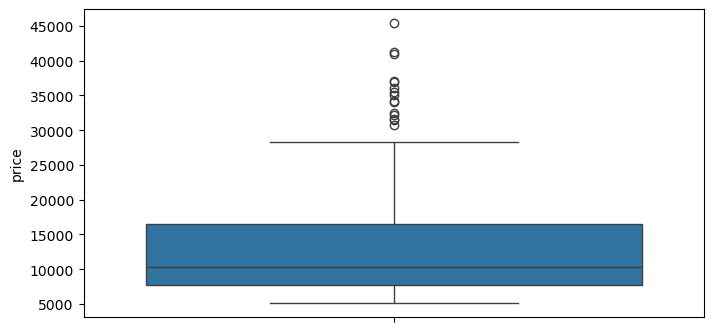

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(carprice_df['price'])  #using boxplot

<Axes: xlabel='price', ylabel='Count'>

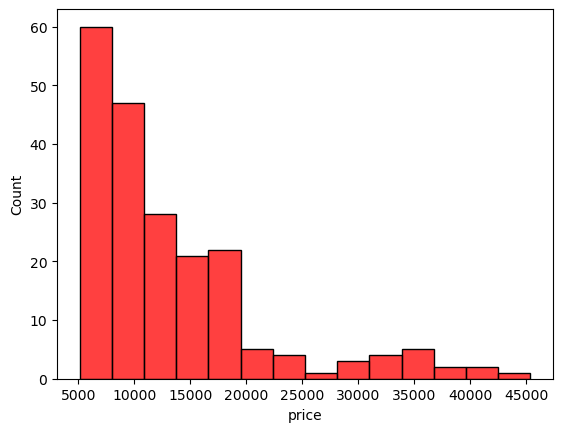

In [26]:
sns.histplot(carprice_df['price'],color='red')  #using histplot

<Axes: xlabel='price', ylabel='Density'>

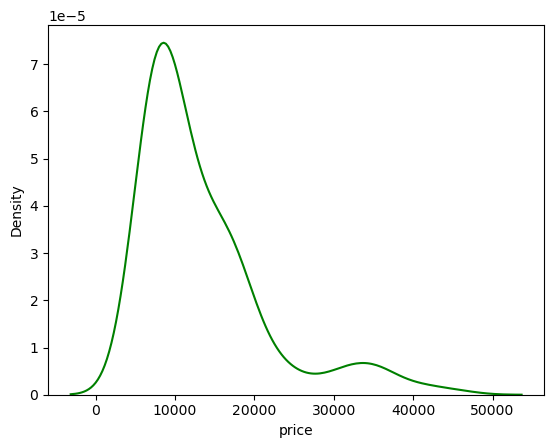

In [23]:
sns.kdeplot(carprice_df['price'],color='green')  #using kdeplot

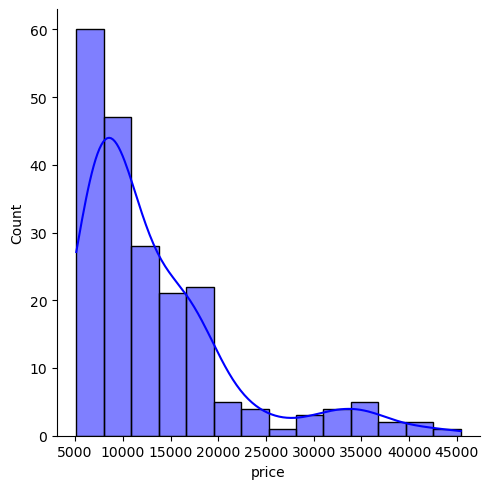

In [56]:
sns.displot(carprice_df['price'], kde=True,color='blue')

In [58]:
print(len(carprice_df))

205


#### OUTLINERS REMOVAL ####IQR METHOD

In [25]:
q1=carprice_df['price'].quantile(0.25)  #also using to remove outliners
q3=carprice_df['price'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)


Q1: 7788.0
Q3: 16503.0
IQR: 8715.0


In [27]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(29575.5, -5284.5)

<Axes: ylabel='price'>

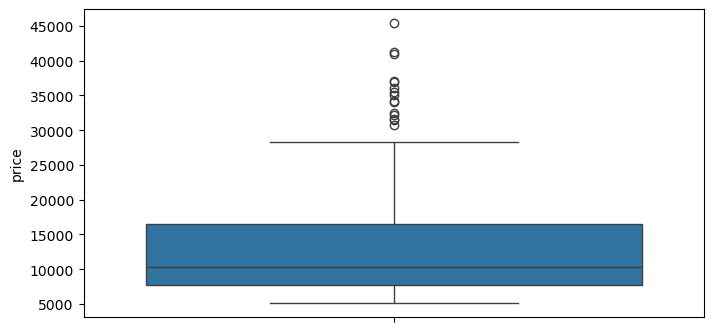

In [29]:
plt.figure(figsize=(8,4))    # Before Capping
sns.boxplot(carprice_df['price'])


In [31]:
#capping
new_carprice_df=carprice_df.copy()

new_carprice_df.loc[new_carprice_df['price']>upper_limit,'price']=upper_limit
new_carprice_df.loc[new_carprice_df['price']<lower_limit,'price']=lower_limit

<Axes: ylabel='price'>

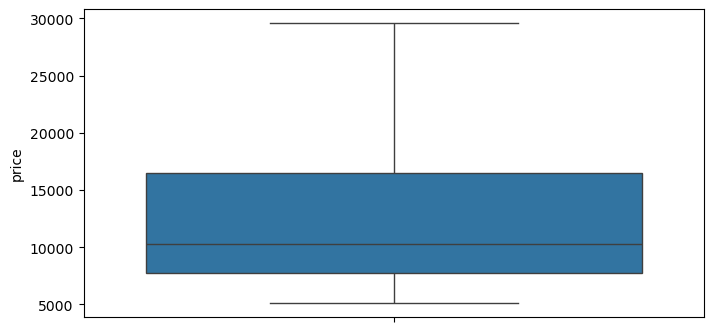

In [33]:
plt.figure(figsize=(8,4))  ## AFTER OUTLINERS REMOVAL
sns.boxplot(new_carprice_df['price'])


In [37]:
len(new_carprice_df)

205

In [35]:
numerical_columns1 =new_carprice_df.select_dtypes(include=['number']).columns.tolist()
print("numerical_columns",numerical_columns)

numerical_columns ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


<Figure size 800x400 with 0 Axes>

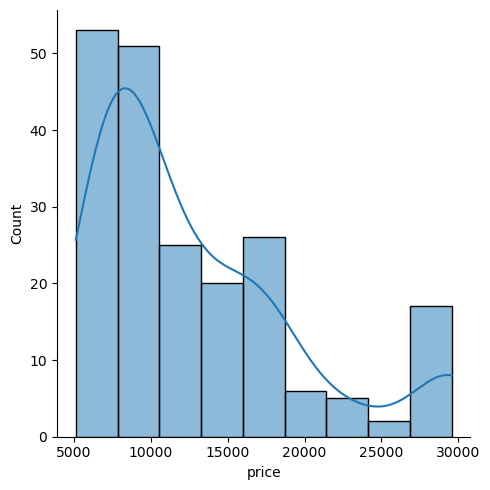

In [37]:
plt.figure(figsize=(8,4))
sns.displot(new_carprice_df['price'],kde=True)

In [39]:
new_carprice_df['price'].skew()

1.222030944709571

In [41]:
new_carprice_df['price']=np.log(carprice_df['price'])

In [43]:
new_carprice_df['price'].skew()

0.672888533977329

In [45]:
new_carprice_df[numerical_columns1].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               0.672889
dtype: float64

In [47]:
new_carprice_df[numerical_columns1].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               0.672889
dtype: float64

<Figure size 800x400 with 0 Axes>

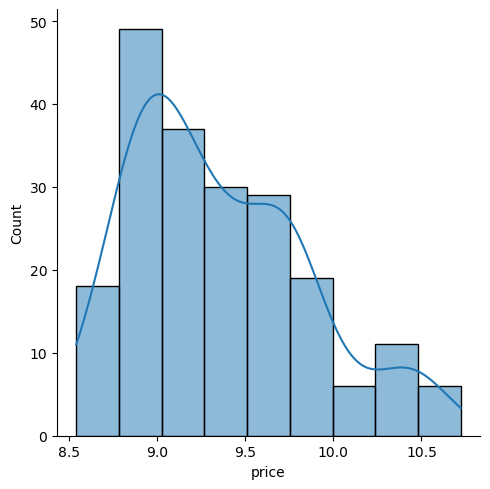

In [51]:
plt.figure(figsize=(8,4))
sns.displot(new_carprice_df['price'],kde=True)

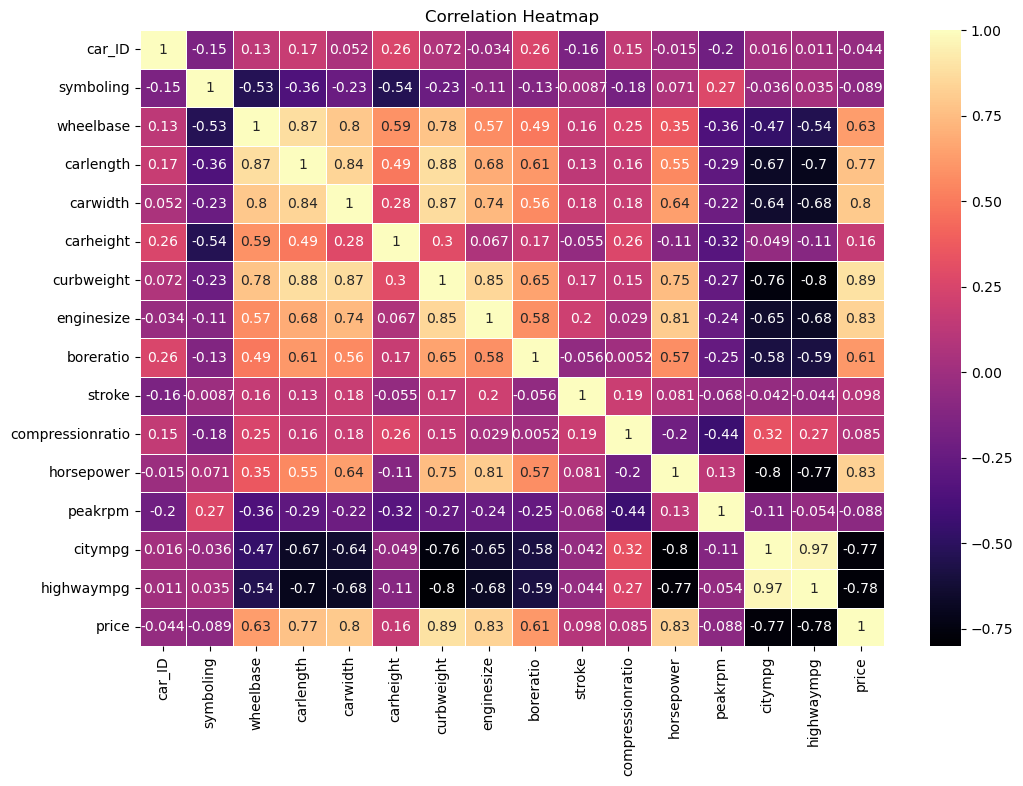

In [49]:
correlation_matrix =new_carprice_df[numerical_columns1].corr()
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### ENCODING

In [ ]:
# categorical values are converted into numerical values by using encoding techniques

In [51]:
new_carprice_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095


In [59]:
label_encoder=LabelEncoder()


In [53]:
categorical_columns=new_carprice_df.select_dtypes(include=['object','category']).columns.tolist()
print("categorical_columns",categorical_columns)

categorical_columns ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [55]:
numerical_columns =new_carprice_df.select_dtypes(include=['number']).columns.tolist()
print("numerical_columns",numerical_columns)

numerical_columns ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


## ENCODING PROCESS

In [61]:
for col in categorical_columns:
    new_carprice_df[col] = label_encoder.fit_transform(new_carprice_df[col])

In [63]:
new_carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,9.510075
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,9.711116
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,9.711116
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,9.543235
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,9.767095


In [65]:
new_carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [79]:
car_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 172 entries, car_ID to CarName_146
dtypes: float64(155), int32(9), int64(8)
memory usage: 268.4 KB


## AFTER ENCODING CHECK CATEGORICAL COLUMNS AND NUMERICAL COLUMNS

In [67]:
categorical_columns=new_carprice_df.select_dtypes(include=['object','category']).columns.tolist()
print("categorical_columns",categorical_columns)

categorical_columns []


In [69]:
new_carprice_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,9.510075
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,9.711116
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,9.711116
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,9.543235
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,9.731809
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,9.854560
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,9.975110
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,10.019936


In [71]:
numerical_columns = new_carprice_df.select_dtypes(include=['number']).columns.tolist()
print(" \n numerical_columns",numerical_columns)

 
 numerical_columns ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


### FEATURE SELECTION

In [73]:
# Feature importance using Random Forest
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(new_carprice_df.drop('price', axis=1), new_carprice_df['price'])
feature_importance = pd.DataFrame({
    'feature': new_carprice_df.drop('price', axis=1).columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
             feature  importance
13        curbweight    0.536992
24        highwaympg    0.181263
16        enginesize    0.154263
21        horsepower    0.029285
23           citympg    0.017276
0             car_ID    0.015200
11          carwidth    0.010456
2            CarName    0.010427
9          wheelbase    0.007621
10         carlength    0.007379
22           peakrpm    0.004508
19            stroke    0.004116
12         carheight    0.003864
6            carbody    0.003518
20  compressionratio    0.003187
17        fuelsystem    0.003101
18         boreratio    0.002032
7         drivewheel    0.001354
1          symboling    0.001040
5         doornumber    0.000889
14        enginetype    0.000772
4         aspiration    0.000681
15    cylindernumber    0.000563
3           fueltype    0.000207
8     enginelocation    0.000004


## PREPROCESSING

In [75]:
print("\nSplitting data...")
X_train, X_test, y_train, y_test = train_test_split(new_carprice_df.drop('price', axis=1), new_carprice_df['price'], test_size=0.2, random_state=42)


Splitting data...


#### SCALING

In [77]:
# 10. Feature Scaling
print("\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Scaling features...


### REGRESSION MODEL TRAINING

In [89]:
print("\nTraining models...")
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'DecisionTree':DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    
}


Training models...


In [91]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # 12. Model Evaluation
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }


Training Linear Regression...

Training SVR...

Training DecisionTree...

Training Random Forest...

Training Gradient Boosting...


### BEST MODEL FINDING

In [93]:
# Print model performance
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Model Performance:

Linear Regression:
MAE: 0.1358
MSE: 0.0323
RMSE: 0.1798
R2: 0.8809

SVR:
MAE: 0.1490
MSE: 0.0402
RMSE: 0.2006
R2: 0.8517

DecisionTree:
MAE: 0.1491
MSE: 0.0378
RMSE: 0.1945
R2: 0.8606

Random Forest:
MAE: 0.1019
MSE: 0.0152
RMSE: 0.1234
R2: 0.9438

Gradient Boosting:
MAE: 0.1177
MSE: 0.0194
RMSE: 0.1392
R2: 0.9286


In [95]:
# Find best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


 ### Hyperparameter Tuning

In [119]:
# 13. Hyperparameter Tuning
print("\nTuning best model...")
if isinstance(best_model, RandomForestRegressor):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
elif isinstance(best_model, GradientBoostingRegressor):
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
elif isinstance(best_model, MLPRegressor):
    param_grid = {
        'hidden_layer_sizes': [(100,), (100, 50)],
        'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.001, 0.01]
    }
else:
    param_grid = {}


Tuning best model...


In [175]:
if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


## MODEL SAVING

In [121]:
import joblib

# 14. Save the Model
print("\nSaving model...")
joblib.dump(best_model, 'car_price_model.joblib')
print("Model and scaler saved as 'carprice_model.joblib' and 'car_price_scaler.joblib'")


Saving model...
Model and scaler saved as 'carprice_model.joblib' and 'car_price_scaler.joblib'


### TEST UNSEEN DATA

In [123]:
# 15. Test with Unseen Data
print("\nTesting with unseen data...")
final_predictions = best_model.predict(X_test_scaled)
final_metrics = {
    'MAE': mean_absolute_error(y_test, final_predictions),
    'MSE': mean_squared_error(y_test, final_predictions),
    'RMSE': np.sqrt(mean_squared_error(y_test, final_predictions)),
    'R2': r2_score(y_test, final_predictions)
}


Testing with unseen data...


## FINAL MODEL PERFORMANCE

In [125]:
print("\nFinal Model Performance:")
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Final Model Performance:
MAE: 1084.9286
MSE: 1993473.8261
RMSE: 1411.9043
R2: 0.9624


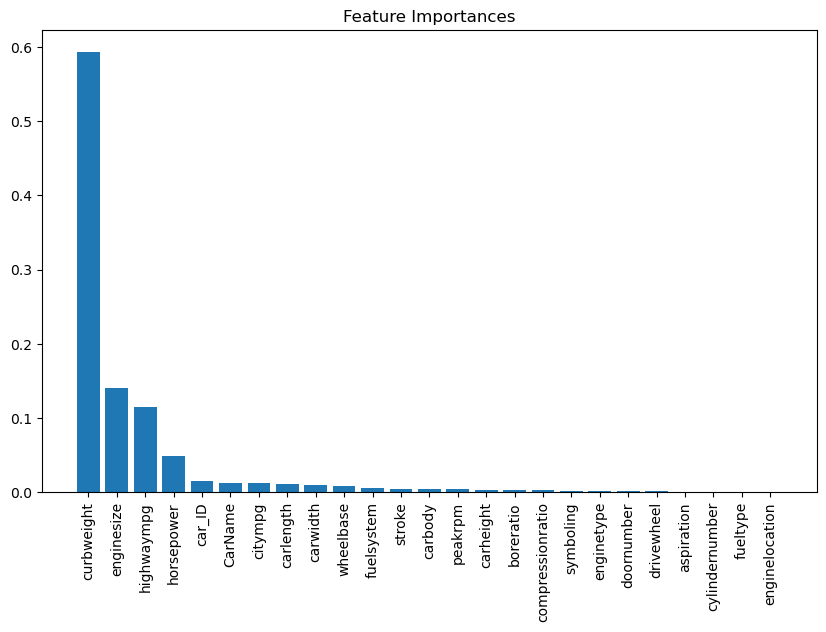

In [103]:


# Feature importance for tree-based models


best_tree_model = models['Random Forest']  # Replace with the best-performing tree model
importances = best_tree_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), new_carprice_df.columns[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()



## CONCLUSION:

Based on the analysis of the Chinese automobile company dataset, Gradient Boosting emerged as the best-performing model for predicting the target variable, price. Its superior performance, compared to other models, highlights its ability to capture the intricate relationships between features and the target variable within the dataset. This finding underscores the effectiveness of Gradient Boosting in handling complex data structures and delivering accurate predictions. 
